In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1 :

##### Fonction n°1:
$f_1^\alpha(X) = \sum_{i=1}^{n} x_i^2$ <br>
Il s'agit de la même fonction que la fonction n°1 de l'atelier 1 à un facteur $\alpha$ près. <br>

In [4]:
def f1(X, a=1):
    x = np.array(X)
    return a * np.sum(x**2)

$\sum_{i=1}^{n} 10^{\alpha \frac {i-1} {n-1}}.x_i^2$

In [5]:
def f2(X, a=1):
    x = np.array(X)
    n = len(x)
    res = 0
    for i in range(1,n+1):
        res += 10**(a*(i-1)/(n-1))*x[i-1]**2
    return res/2

$10.n + \sum_{i=1}^{n} (10^{\alpha \frac {i-1} {n-1}}.(x_i - 1)^2 - 10.\cos(2\pi(x_i - 1)))$

In [6]:
def f3(X, a=1):
    x = np.array(X)
    n = len(x)
    res = 10*n
    for i in range(1,n+1):
        res += 10**(a*(i-1)/(n-1))*(x[i-1] - 1)**2 - 10*np.cos(2*np.pi*(x[i-1]-1))
    return res

$\sum_{i=1}^{n} (10^{\alpha}.((x_i - 1)^2 - (x_{i+1} - 1))^2 + (x_i - 2)^2)$

In [7]:
def f4(X, a=1):
    x = np.array(X)
    n = len(x)
    res = 0
    for i in range(n-1):
        res += (10**a)*((x[i] - 1)**2 - (x[i+1] - 1))**2 + (x[i] - 2)**2
    return res

In [8]:
def plot_contour_f(f, a, frm=-5.0, to=5.0, spc=0.1):
    x = np.arange(frm, to, spc)
    y = np.arange(frm, to, spc)
    X, Y = np.meshgrid(x, y)
    n = len(a)
    if n < 3:
        height = 10
        width = n*10
    else:
        height = (n//3+1)*5
        width = 15
    plt.figure(figsize=(width,height))
    for k in range(n):
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f(np.array([X[i][j],Y[i][j]]), a[k]))
            Z.append(l)
        plt.subplot((len(a)//3)+1,3,k+1)
        plt.contour(X,Y,Z,20)
        plt.title('a = {}'.format(a[k]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
    plt.show()

#### Question 1.1 : 
 Visualiser la fonction $f^{α=\frac {1} {2}}_1$ en dimension 2.

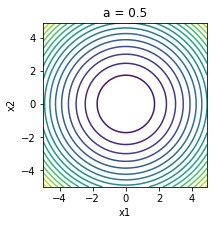

In [141]:
plot_contour_f(f1, [0.5])

#### Question 1.2 : 
 Visualiser la fonction $f^{α=-1}_2$, $f^{α=\frac {1} {2}}_2$, $f^{α=1}_2$, $f^{α=3}_2$, $f^{α=6}_2$ en dimension 2.

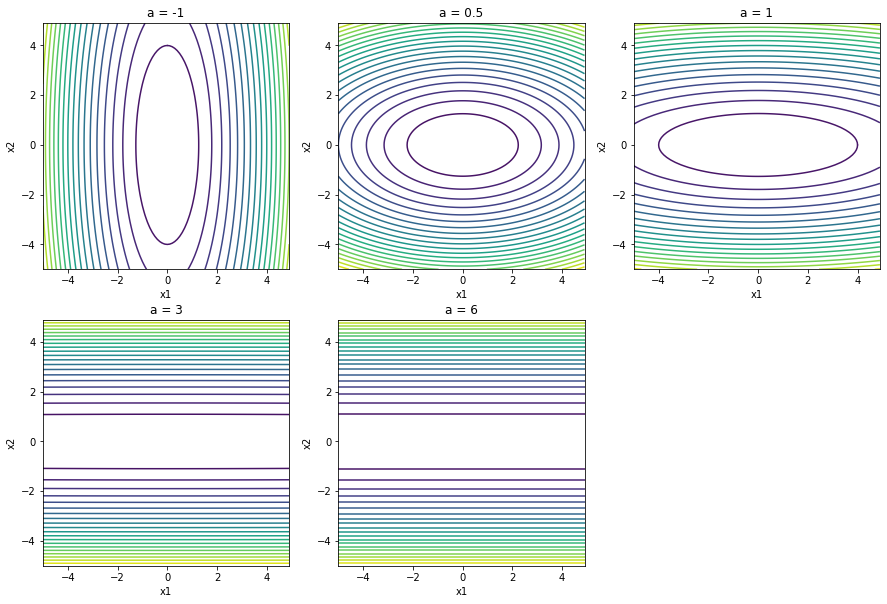

In [142]:
plot_contour_f(f2, [-1, 0.5, 1, 3, 6])

#### Question 1.3 : 
Visualiser l’impacte de $\alpha$ sur la structure des lignes d’équi-contour, vous pouvez
tracer plusieurs sous-figures en même temp.

<ipython-input-140-16ff4c874882>:22: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z,20)


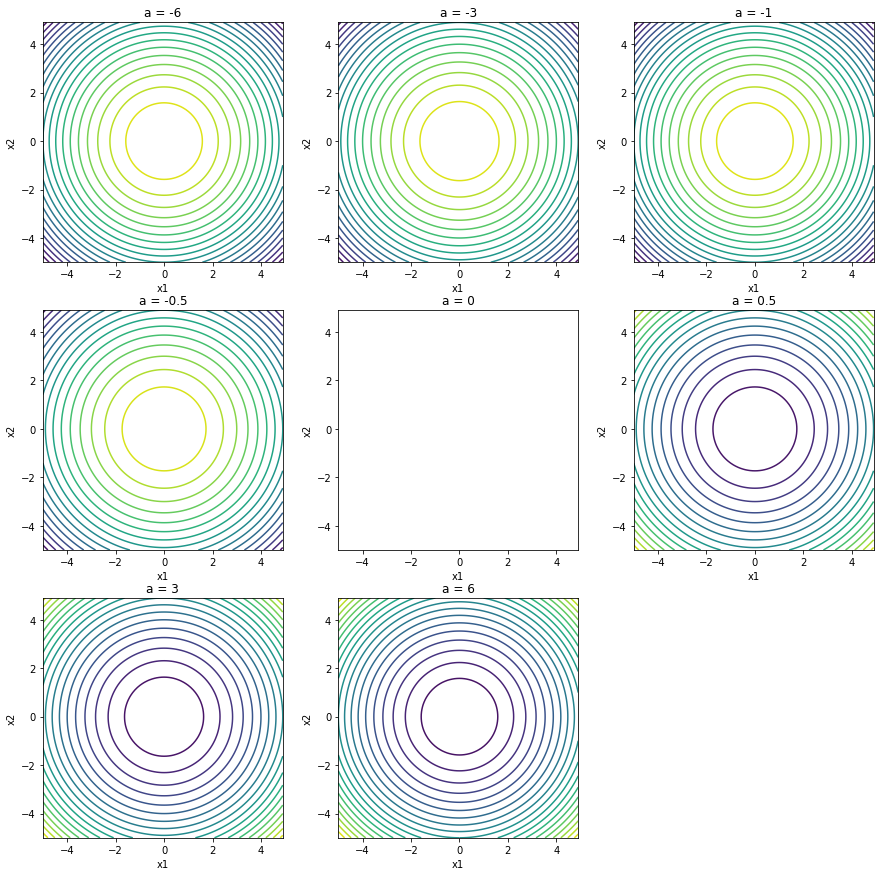

In [143]:
plot_contour_f(f1, [-6, -3, -1, -1/2, 0, 1/2, 3, 6])

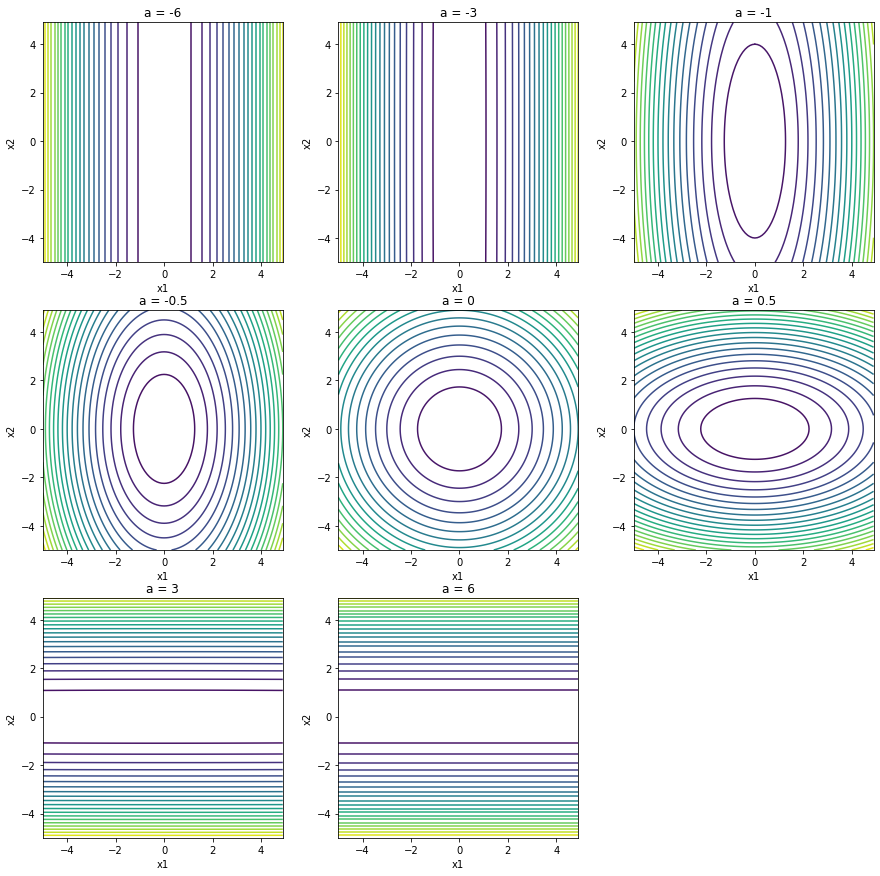

In [144]:
plot_contour_f(f2, [-6, -3, -1, -1/2, 0, 1/2, 3, 6])

On voit que l'impact d'$\alpha$ est symétrique par rapport à 0, si $\alpha$ part dans les négatifs, $x_1$ prend de plus en plus d'importance alors si $\alpha$ part dans les positifs, c'est $x_2$ qui en prend de plus en plus.

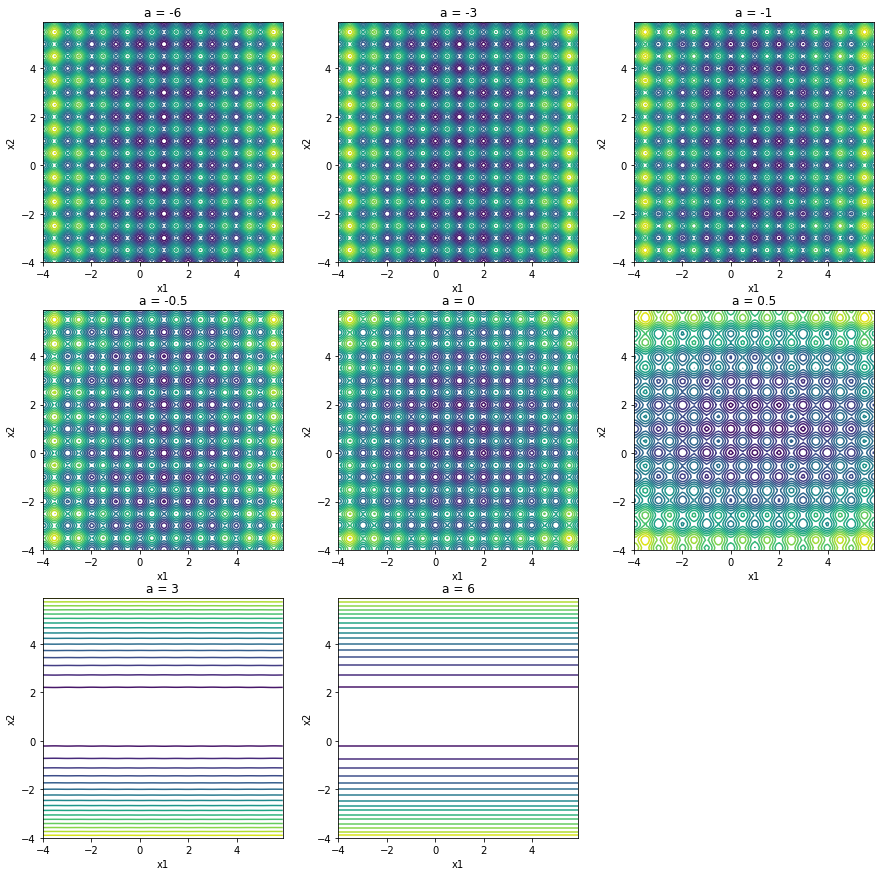

In [148]:
plot_contour_f(f3, [-6, -3, -1, -1/2, 0, 1/2, 3, 6], -4, 6)

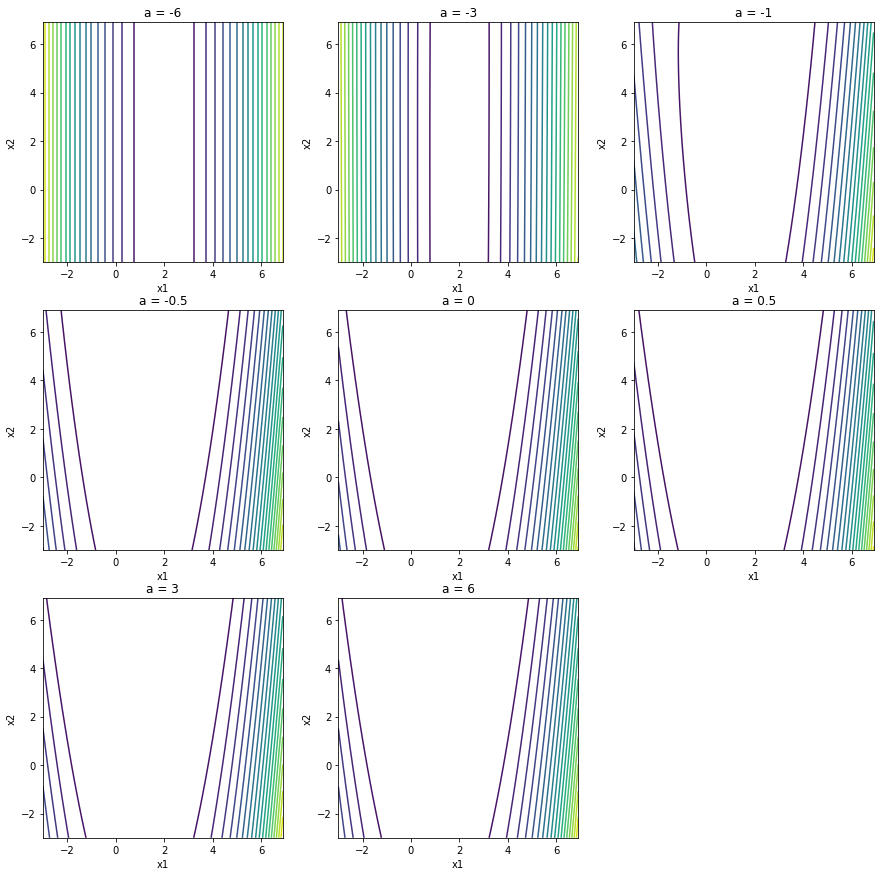

In [147]:
plot_contour_f(f4, [-6, -3, -1, -1/2, 0, 1/2, 3, 6], -3, 7)

### Question 2 :

In [166]:
def g_f1(X, a=1):
    x = np.array(X)
    return 2*a*x

### Question 3 :

In [167]:
def algo1(f, alpha, x0, grad, sigma0, n_iter=10**6, approx=10**(-12)):
    X = x0
    Xs = np.array([X])
    fXs =np.array([f(alpha, X)])
    xt = x0
    gXs = np.array([np.linalg.norm(grad(xt, alpha))])
    sigmat = sigma0
    t=0
    while (t < n_iter) and np.linalg.norm(grad(xt, alpha)) >= approx:
        dt = -grad(xt, alpha)
        xt = xt + sigmat*dt
        if f(xt, alpha) < f(X, alpha):
            X = xt
        t+=1
        Xs = np.vstack((Xs, X))
        fXs = np.vstack((fXs, f(alpha, X)))
        gXs = np.vstack((gXs, np.linalg.norm(grad(xt, alpha))))
    return X, Xs, fXs, gXs

### Question 4 :

#### Question 4.1 :

In [310]:
def plot_x_f_g(alg, f, a, g_f, x0=np.array([10,10,10,10,10,10,10,10,10,10]), sigma0=0.1, g2_f=None, n_iter=10**6, approx=10**(-12)):
    n = len(a)
    if n <= 3:
        height = (n//3+1)*5
    else:
        height = (n//3+1)*10
    width = 15
    plt.figure(figsize=(width,height))
    for i in range(n):
        if g2_f == None:
            X, Xs, fXs, gXs = alg(f, a[i], x0, g_f, sigma0, n_iter=n_iter, approx=approx)
        else:
            X, Xs, fXs, gXs = alg(f, a[i], x0, g_f, g2_f, n_iter=n_iter, approx=approx)
        plt.subplot(n,3,1+3*i)
        plt.plot(Xs)
        plt.title('X pour a = {}'.format(a[i]))
        plt.subplot(n,3,2+3*i)
        plt.semilogy(fXs)
        plt.title('f(X) pour a = {}'.format(a[i]))
        plt.subplot(n,3,3+3*i)
        plt.semilogy(gXs)
        plt.title('norm de grad(X) pour a = {}'.format(a[i]))
        print(f'Nb itérations : {len(fXs)-1} pour a = {a[i]}')
    plt.show()

Nb itérations : 286 pour a = 0.5


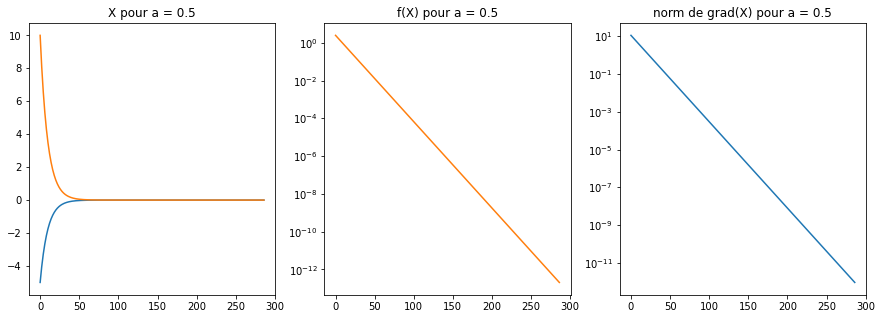

In [203]:
plot_x_f_g(algo1, f1, [0.5], g_f1, x0=np.array([-5,10]))

In [218]:
X, Xs, fXs, gXs = algo1(f1, 0.5, np.array([-5,10]), g_f1, 0.1)

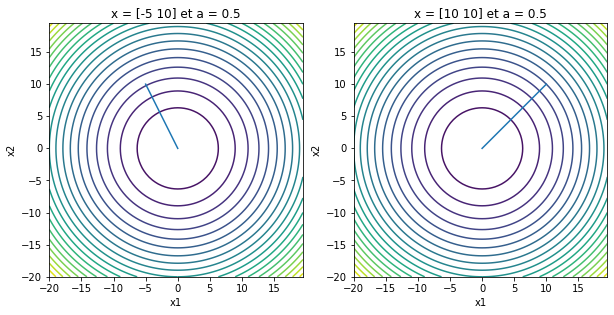

In [235]:
alphas = [0.5]
xs = [np.array([-5,10]),  np.array([10,10])]
for a in alphas:
    plt.figure(figsize=(10,10))
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo1(f1, a, xs[t], g_f1, 0.1)
        x = np.arange(-20, 20, 0.5)
        y = np.arange(-20, 20, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f1(np.array([X[i][j],Y[i][j]]), a))
            Z.append(l)
        plt.subplot(1,2,t+1)
        plt.contour(X,Y,Z,20)
        plt.plot(Xs[:,0],Xs[:,1])
        plt.title('x = {} et a = {}'.format(xs[t], a))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

Nb itérations : 288 pour a = 0.5


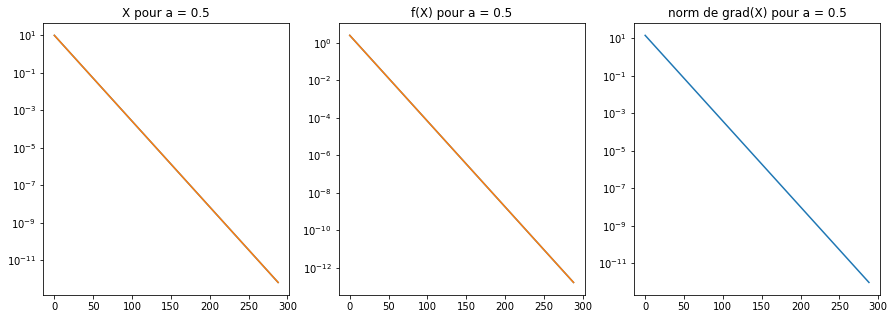

In [187]:
plot_x_f_g(algo1, f1, [0.5], g_f1, x0=np.array([10,10]))

In [218]:
X, Xs, fXs, gXs = algo1(f1, 0.5, np.array([10,10]), g_f1, 0.1)

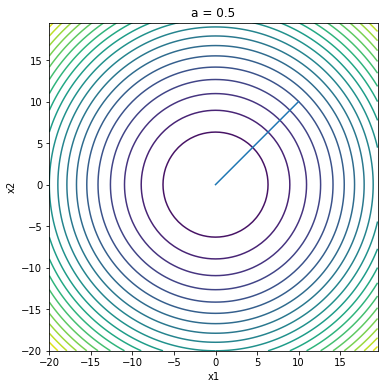

63


In [217]:
x = np.arange(-20, 20, 0.5)
y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)
Z = []
plt.figure(figsize=(20,20))
for i in range(len(X)):
    l = []
    for j in range(len(Y)):
        l.append(f1(np.array([X[i][j],Y[i][j]]), 0.5))
    Z.append(l)
plt.subplot(1,3,1)
plt.contour(X,Y,Z,20)
plt.plot(Xs[:,0],Xs[:,1])
plt.title('a = {}'.format(0.5))
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('scaled')
plt.show()
print(len(Xs))

#### Question 4.2 :

Nb itérations : 296 pour a = 0.5
Nb itérations : 2864 pour a = 0.05
Nb itérations : 26467 pour a = 0.005


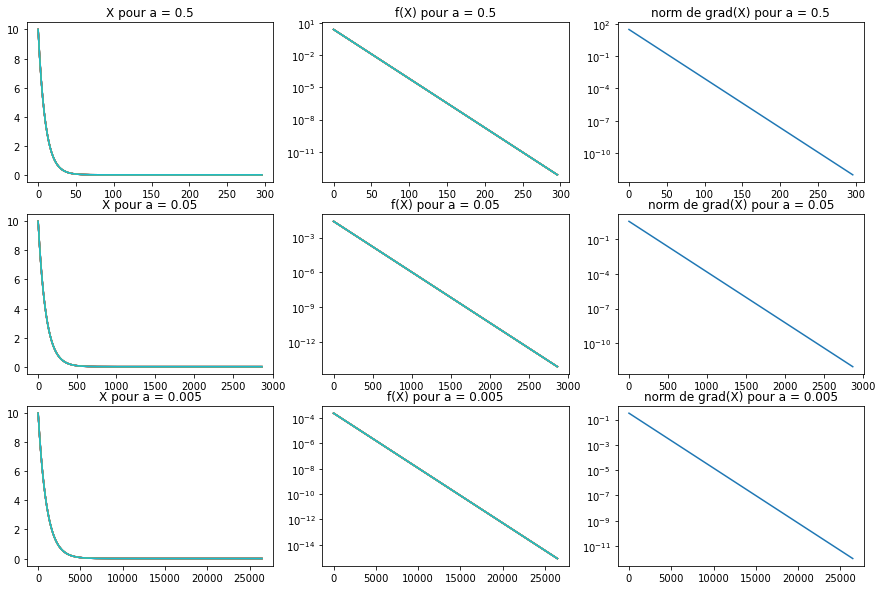

In [219]:
alphas = [1/2,1/20,1/200]
plot_x_f_g(algo1, f1, alphas, g_f1)

Nb itérations : 3093 pour a = 0.5
Nb itérations : 28768 pour a = 0.05
Nb itérations : 264785 pour a = 0.005


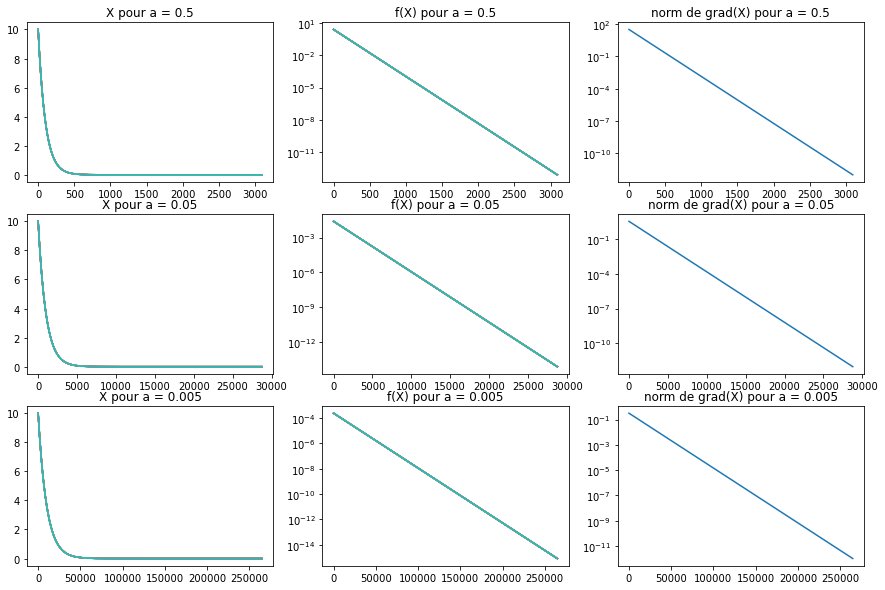

In [220]:
alphas = [1/2,1/20,1/200]
plot_x_f_g(algo1, f1, alphas, g_f1, sigma0=0.01)

### Question 5 :

In [172]:
def armijo(f,x,grad,sigma0,beta,d, theta):
    sigma = sigma0
    while f(x+sigma*d, beta) > f(x, beta) + sigma*theta*grad(x, beta).T@d:
        sigma = beta*sigma
    return sigma

### Question 6 :

In [177]:
def algo2(f, alpha, x0, grad, sigma0, n_iter=10**6, approx=10**(-12)):
    X = x0
    Xs = [X]
    fXs =[f(X, alpha)]
    xt = x0
    gXs =[np.linalg.norm(grad(xt, alpha))]
    t=0
    while (t < n_iter) and np.linalg.norm(grad(xt, alpha)) >= approx:
        dt = -grad(xt, alpha)
        sigmat =  armijo(f,xt,grad,sigma0,1/2,dt,1/2)
        xt = xt + sigmat*dt
        if f(xt, alpha) < f(X, alpha):
            X = xt
        t+=1
        Xs = np.vstack((Xs, X))
        fXs = np.vstack((fXs, f(X, alpha)))
        gXs = np.vstack((gXs,np.linalg.norm(grad(xt, alpha))))
    return X, Xs, fXs, gXs

### Question 7 :

Nb itérations : 32 pour a = 0.5
Nb itérations : 1 pour a = 0.05
Nb itérations : 252 pour a = 0.005


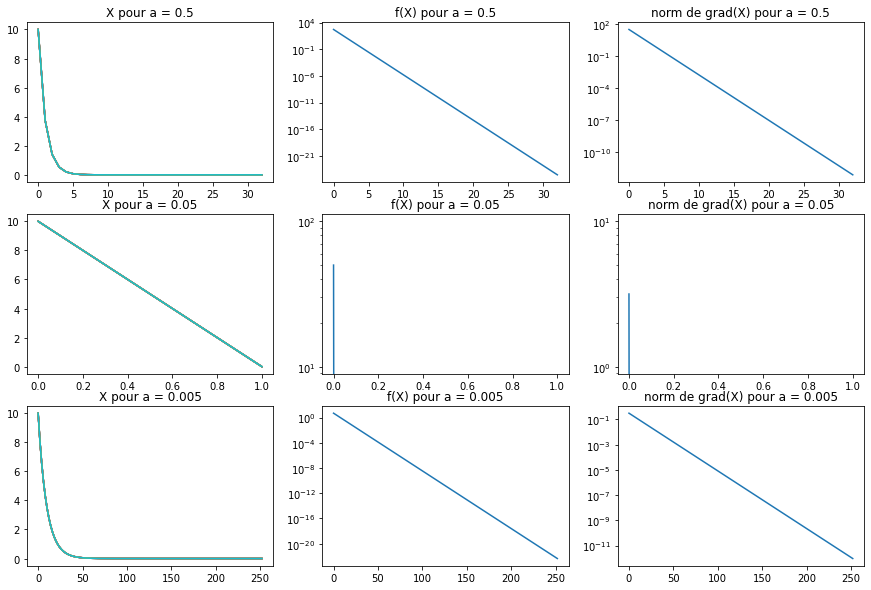

In [244]:
alphas = [1/2,1/20,1/200]
plot_x_f_g(algo2, f1, alphas, g_f1, sigma0=10)

Nb itérations : 1 pour a = 0.5
Nb itérations : 18 pour a = 0.05
Nb itérations : 318 pour a = 0.005


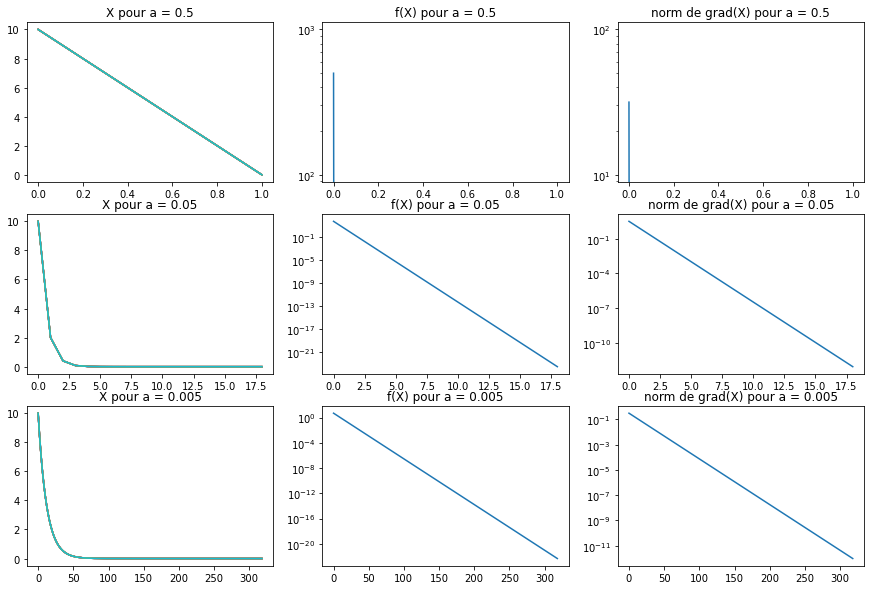

In [250]:
alphas = [1/2,1/20,1/200]
plot_x_f_g(algo2, f1, alphas, g_f1, sigma0=8)

### Question 8 :

In [222]:
def g_f2(X, a=1):
    x = np.array(X)
    n = len(x)
    x_res = []
    for i in range(1,n+1):
        x_res.append(10**(a*(i-1)/(n-1))*x[i-1])
    return np.array(x_res)

In [223]:
def g_f3(X, a=1):
    x = np.array(X)
    n = len(x)
    x_res = []
    for i in range(1,n+1):
        x_res.append(2*10**(a*(i-1)/(n-1))*(x[i-1]-1) + 2*10*np.pi*np.sin(2*np.pi*(x[i-1]-1)))
    return np.array(x_res)

In [10]:
def g_f4(X, a=1):
    x = np.array(X)
    n = len(x)
    x_res = [4*10**a*(x[0]-1)*((x[0] - 1)**2 - (x[1]-1)) + 2*(x[0] - 2)]
    for i in range(2,n):
        x_res.append(4*10**a*(x[i-1]-1)*((x[i-1] - 1)**2 - (x[i]-1)) + 2*(x[i-1] - 2) - 2*10**a*((x[i-2] - 1)**2 - (x[i-1] -1)))
    x_res.append(- 2*10**a*((x[n-2] - 1)**2 - (x[n-1] -1)))
    return np.array(x_res)

### Question 9 : 

#### Question 9.1 :

Nb itérations : 130 pour a = 1
Nb itérations : 254 pour a = 2
Nb itérations : 7157 pour a = 3


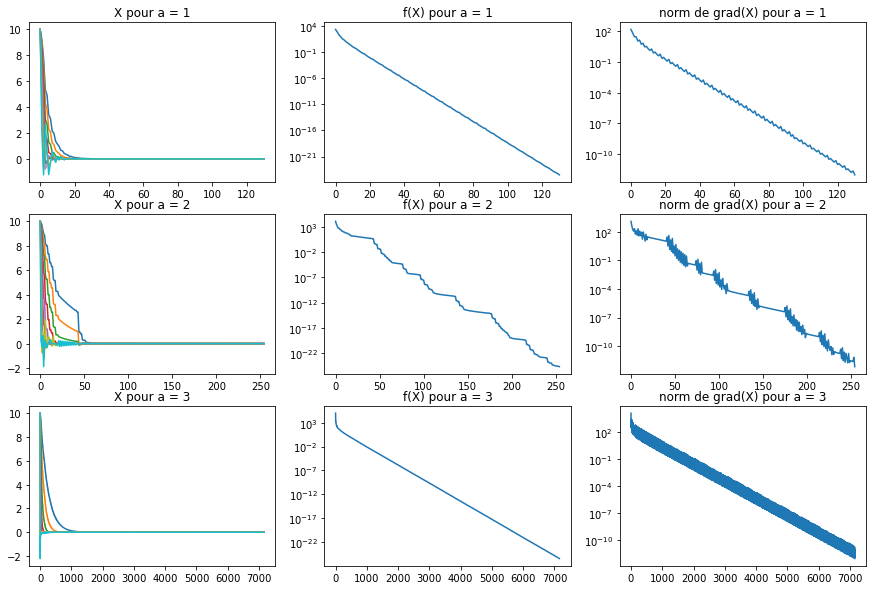

In [225]:
alphas = [1,2,3]
plot_x_f_g(algo2, f2, alphas, g_f2, sigma0=10)

Nb itérations : 73 pour a = 1
Nb itérations : 1184 pour a = 2
Nb itérations : 5653 pour a = 3


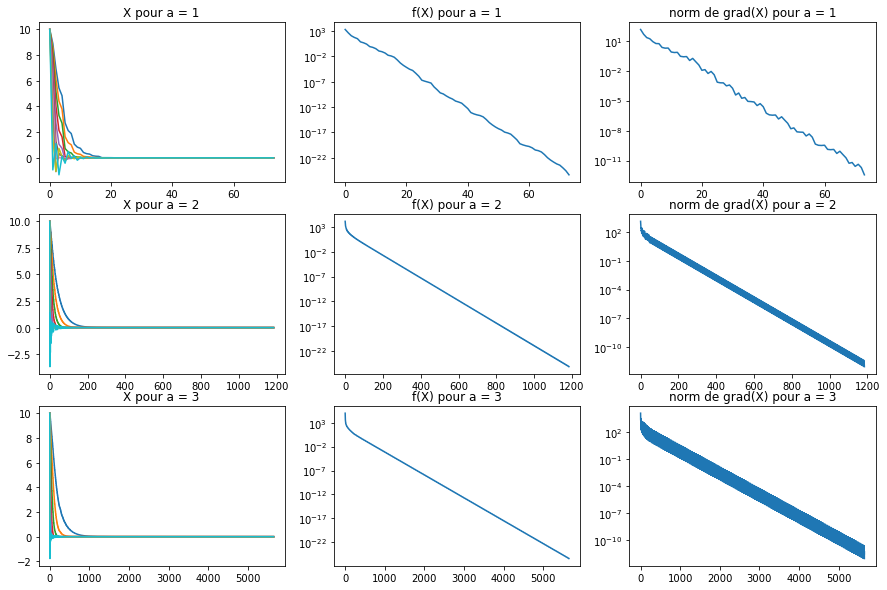

In [265]:
alphas = [1,2,3]
plot_x_f_g(algo2, f2, alphas, g_f2, sigma0=28)

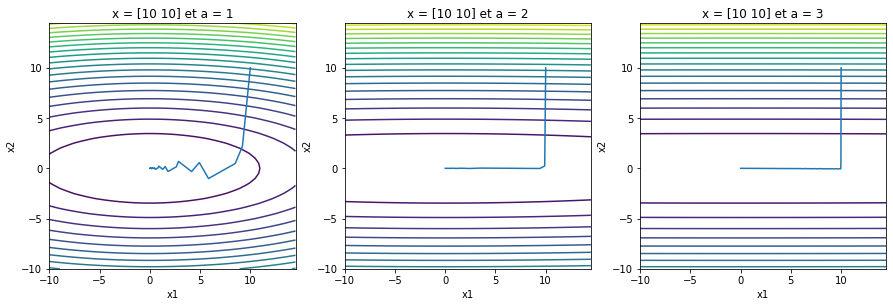

In [249]:
alphas = [1,2,3]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo2(f2, alphas[a], xs[t], g_f2,10)
        x = np.arange(-10, 15, 0.5)
        y = np.arange(-10, 15, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f2(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,20)
        plt.plot(Xs[:,0],Xs[:,1])
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

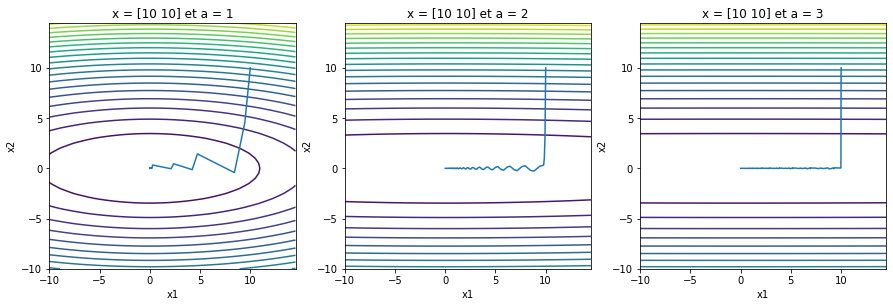

In [266]:
alphas = [1,2,3]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo2(f2, alphas[a], xs[t], g_f2,28)
        x = np.arange(-10, 15, 0.5)
        y = np.arange(-10, 15, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f2(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,20)
        plt.plot(Xs[:,0],Xs[:,1])
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

#### Question 9.2 :

Nb itérations : 1000 pour a = 0.1
Nb itérations : 1000 pour a = 0.5
Nb itérations : 1000 pour a = 1
Nb itérations : 1000 pour a = 2
Nb itérations : 1000 pour a = 3


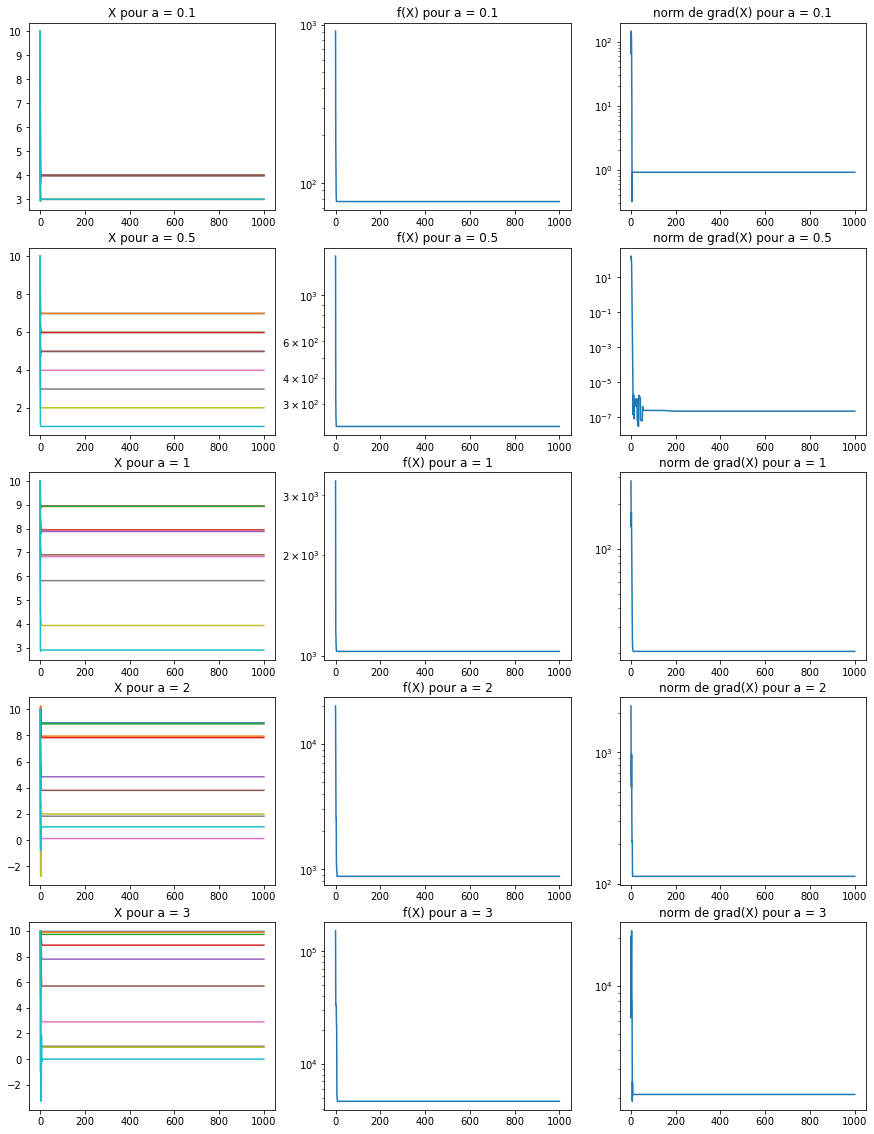

In [267]:
alphas = [0.1,0.5,1,2,3]
plot_x_f_g(algo2, f3, alphas, g_f3, sigma0=10, n_iter=10**3)

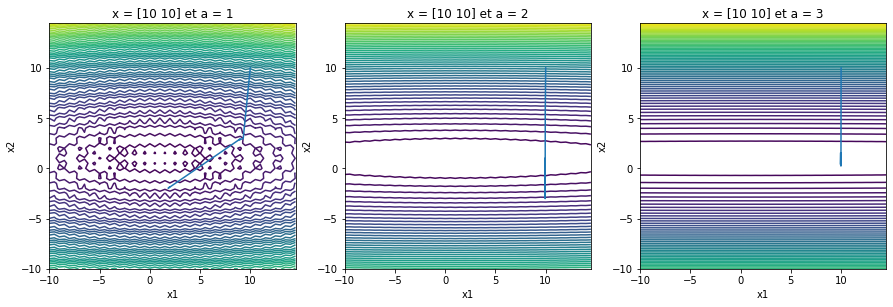

In [272]:
alphas = [1,2,3]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo2(f3, alphas[a], xs[t], g_f3,10, n_iter=1000)
        x = np.arange(-10, 15, 0.5)
        y = np.arange(-10, 15, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f3(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,60)
        plt.plot(Xs[:,0],Xs[:,1])
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

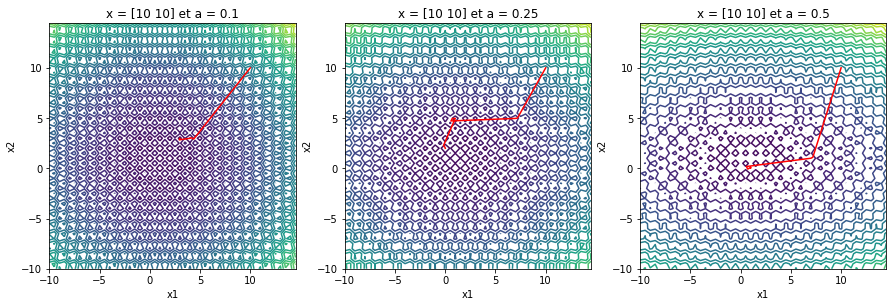

In [275]:
alphas = [0.1,0.25,0.5]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo2(f3, alphas[a], xs[t], g_f3,10, n_iter=1000)
        x = np.arange(-10, 15, 0.5)
        y = np.arange(-10, 15, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f3(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,30)
        plt.plot(Xs[:,0],Xs[:,1], c='red')
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

Nb itérations : 1000 pour a = 0.1
Nb itérations : 983 pour a = 0.5
Nb itérations : 1000 pour a = 1
Nb itérations : 1000 pour a = 2
Nb itérations : 1000 pour a = 3


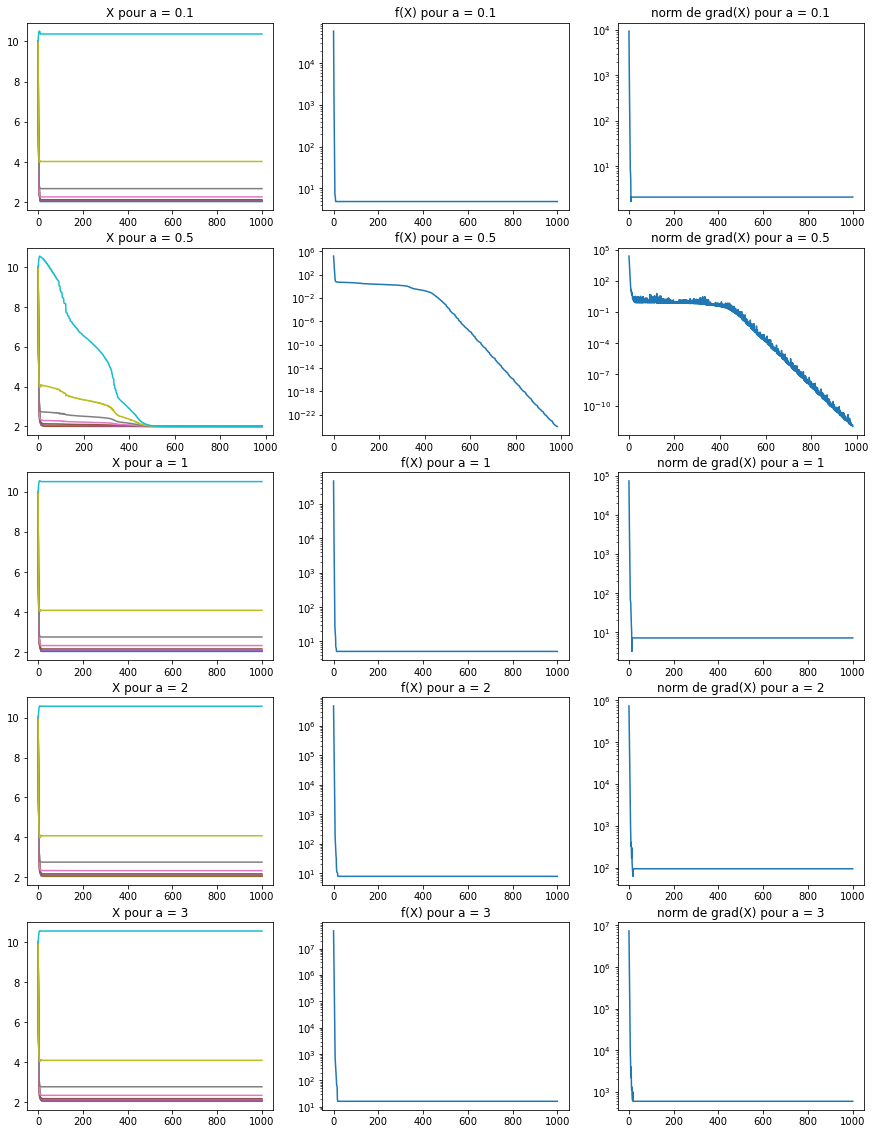

In [282]:
alphas = [0.1,0.5,1,2,3]
plot_x_f_g(algo2, f4, alphas, g_f4, sigma0=10, n_iter=10**3)

Locator attempting to generate 1762 ticks ([0.0, ..., 880.5]), which exceeds Locator.MAXTICKS (1000).


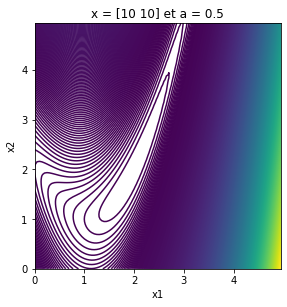

In [294]:
alphas = [0.5]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo2(f4, alphas[a], xs[t], g_f4,10, n_iter=10000)
        x = np.arange(0, 5, 0.05)
        y = np.arange(0, 5, 0.05)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f4(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,2000)
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

### Question 10 :

In [300]:
def g2_f1(X, a=1):
    x = np.array(X)
    return 2*a * np.ones(len(x))

In [301]:
def g2_f2(X, a=1):
    x = np.array(X)
    n = len(x)
    x_res = []
    for i in range(1,n+1):
        x_res.append(10**(a*(i-1)/(n-1)))
    return x_res

In [302]:
def g2_f3(X, a=1):
    x = np.array(X)
    n = len(x)
    x_res = []
    for i in range(1,n+1):
        x_res.append(2*10**(a*(i-1)/(n-1))*1 + 4*10*np.pi**2*np.cos(2*np.pi*(x[i-1]-1)))
    return x_res

$$ g_1 = (4.10^a.(x_i - 1).((x_i - 1)^2 - (x_{i+1} - 1)) + 2(x_i - 2))$$<br>

$$g_2 = (- 2.10^a.((x_{i-1} - 1)^2 - (x_{i} -1)))$$ <br>

$g_1 = 4.10^a.(x_i - 1).((x_i - 1)^2 - (x_{i+1} - 1)) + 2(x_i - 2)$<br>
$g_1' = 4.10^a.(((x_i - 1)^2 - (x_{i+1} - 1)) + (x_i - 1).2(x_i - 1)) + 2 $ sur $x_i$<br>
$= 4.10^a.(((x_i - 1)^2 - (x_{i+1} - 1)) + 2(x_i - 1)^2) + 2 $<br>
$= 4.10^a.((3(x_i - 1)^2 - (x_{i+1} - 1)) + 2 $<br>
<br>
<br>
$g_1' = - 4.10^a.(x_i - 1)$ sur $x_{i+1}$<br>

$g_2 = - 2.10^a.((x_i - 1)^2 - (x_{i+1} -1))$<br>
$g_2' = - 2.10^a.2(x_i - 1)$ sur $x_i$<br>
$= - 2.10^a.2(x_i - 1)$<br>
<br>
<br>
$g_2' = 2.10^a$ sur $x_{i+1}$<br>

In [2]:
def g2_f4(X, a=1):
    x = np.array(X)
    n = len(x)
    X_res = [4*10**a*(3*(x[1-1] - 1)**2 - (x[1] - 1))+2]
    for i in range(2,n):
        X_res.append(4*10**a*(3*(x[i-1] - 1)**2 - (x[i] - 1)) + 2 + 2*10**a)
    X_res.append(2*10**a)
    return X_res

In [1]:
def algo_newton(f, alpha, x0, grad, grad2, n_iter=10**6, approx=10**(-12)):
    X = x0
    Xs = [X]
    fXs =[f(X, alpha)]
    xt = x0
    gXs = [np.linalg.norm(grad(xt, alpha))]
    x_aux = x0+153
    t=0
    while (t < n_iter) and np.linalg.norm(grad(xt, alpha)) >= approx:
        dt = -grad(xt, alpha)/grad2(xt, alpha)
        x_aux = xt
        xt = xt + dt
        if f(xt, alpha)< f(X, alpha):
            X = xt
        t+=1
        Xs = np.vstack((Xs, X))
        fXs = np.vstack((fXs, f(X, alpha)))
        gXs = np.vstack((gXs, [np.linalg.norm(grad(xt, alpha))]))
    return X, Xs, fXs, gXs

Nb itérations : 1 pour a = -3
Nb itérations : 1 pour a = -1
Nb itérations : 1 pour a = 1
Nb itérations : 1 pour a = 3


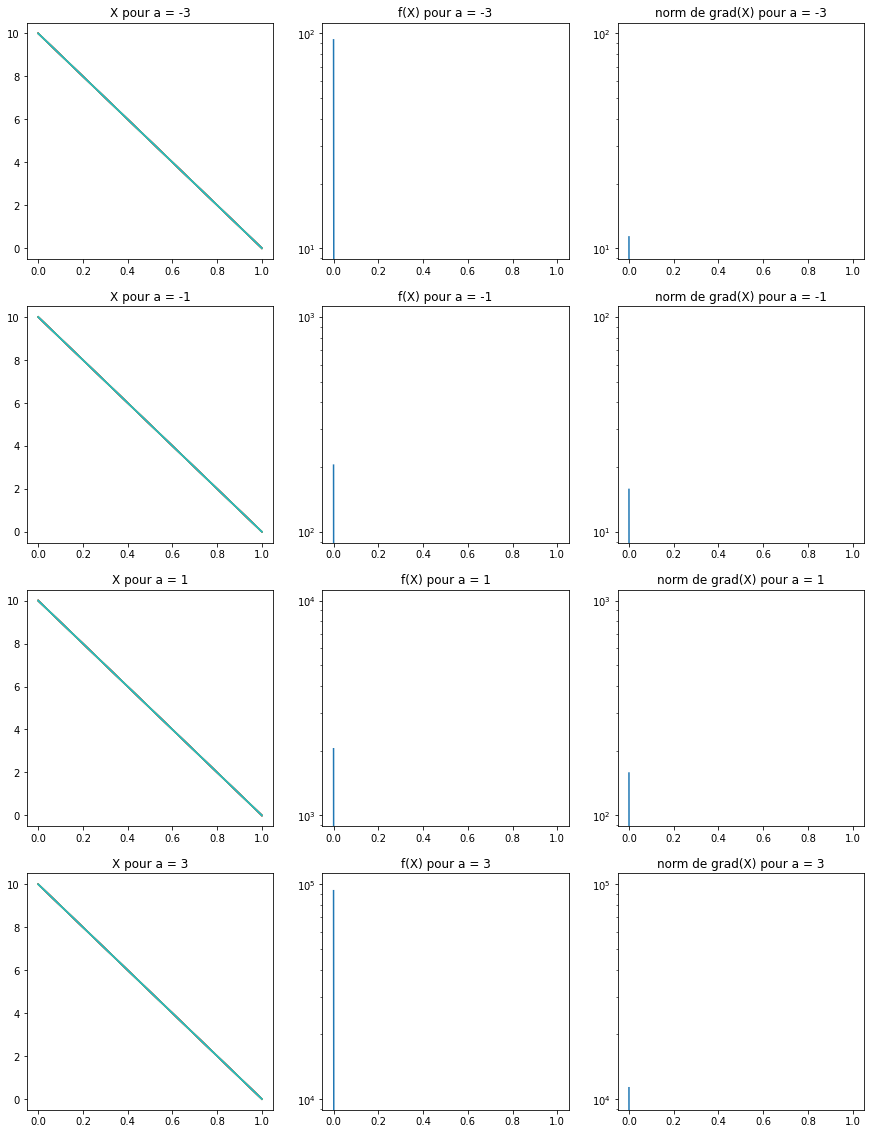

In [318]:
alphas = [-3,-1,1,3]
plot_x_f_g(algo_newton, f2, alphas, g_f2, g2_f=g2_f2)

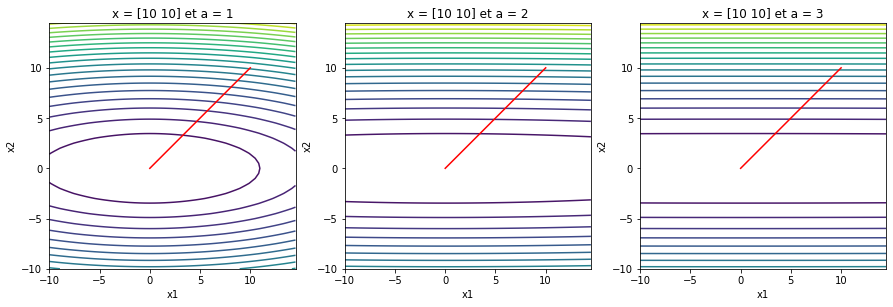

In [317]:
alphas = [1,2,3]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo_newton(f2, alphas[a], xs[t], g_f2,g2_f2)
        x = np.arange(-10, 15, 0.5)
        y = np.arange(-10, 15, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f2(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,20)
        plt.plot(Xs[:,0],Xs[:,1], c='red')
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

Nb itérations : 4 pour a = 0.1
Nb itérations : 6 pour a = 0.5
Nb itérations : 242 pour a = 0.75
Nb itérations : 10000 pour a = 1
Nb itérations : 10000 pour a = 2


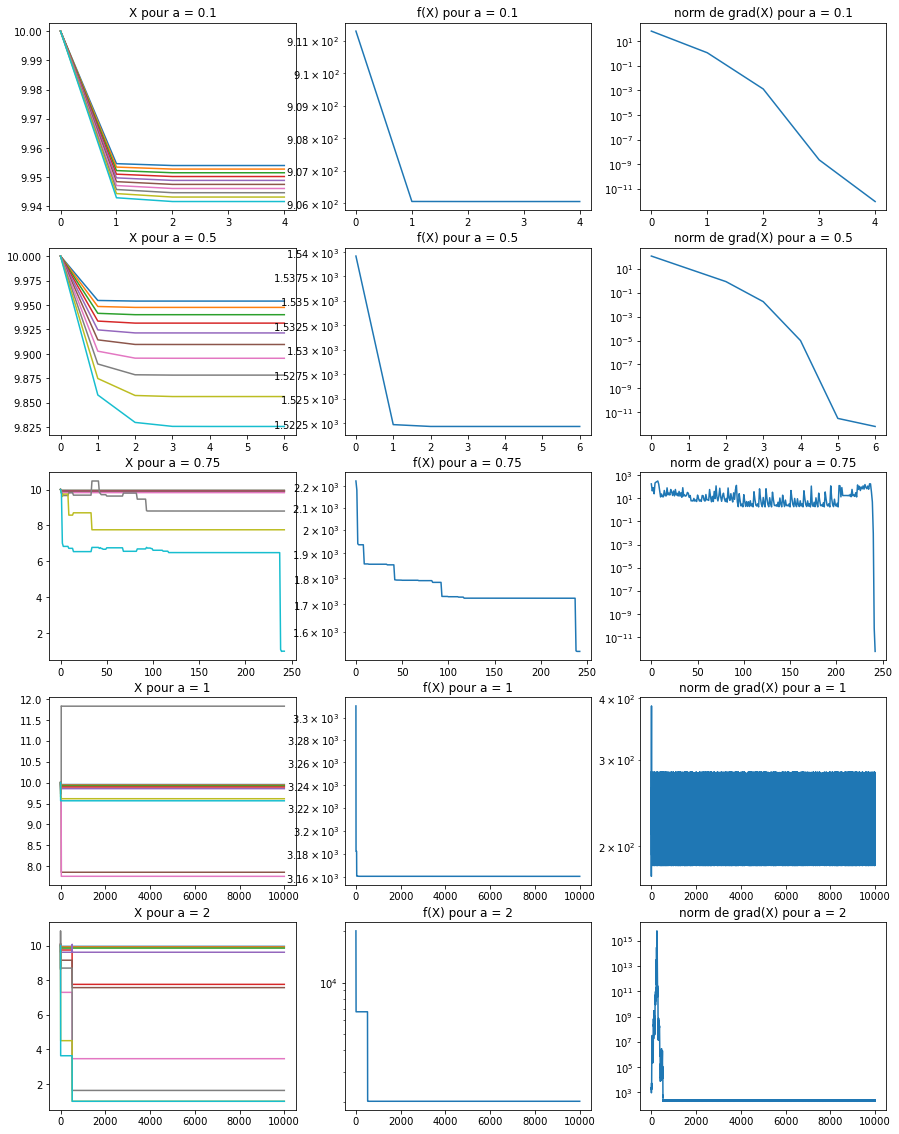

In [324]:
alphas = [0.1,0.5, 0.75, 1,2]
plot_x_f_g(algo_newton, f3, alphas, g_f3, g2_f=g2_f3, n_iter = 10**4)

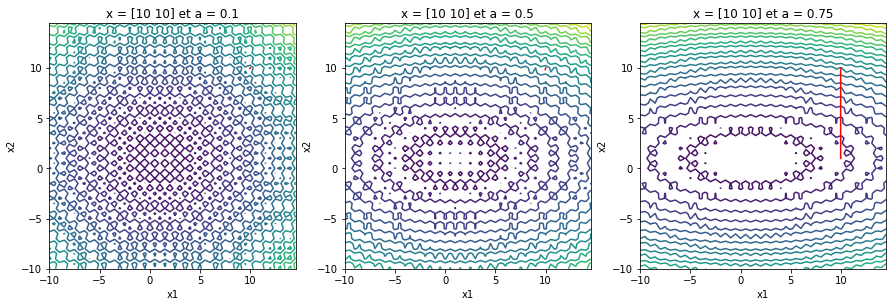

In [332]:
alphas = [0.1,0.5,0.75]
xs = [np.array([10,10])]
plt.figure(figsize=(15,10))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo_newton(f3, alphas[a], xs[t], g_f3,g2_f3, approx=10**(-50), n_iter=10000)
        x = np.arange(-10, 15, 0.5)
        y = np.arange(-10, 15, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f3(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,20)
        plt.plot(Xs[:,0],Xs[:,1], c='red')
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis('scaled')
plt.show()

Nb itérations : 10000 pour a = 0.25
Nb itérations : 10000 pour a = 0.5
Nb itérations : 10000 pour a = 0.75
Nb itérations : 10000 pour a = -1
Nb itérations : 23 pour a = -2
Nb itérations : 12 pour a = -3


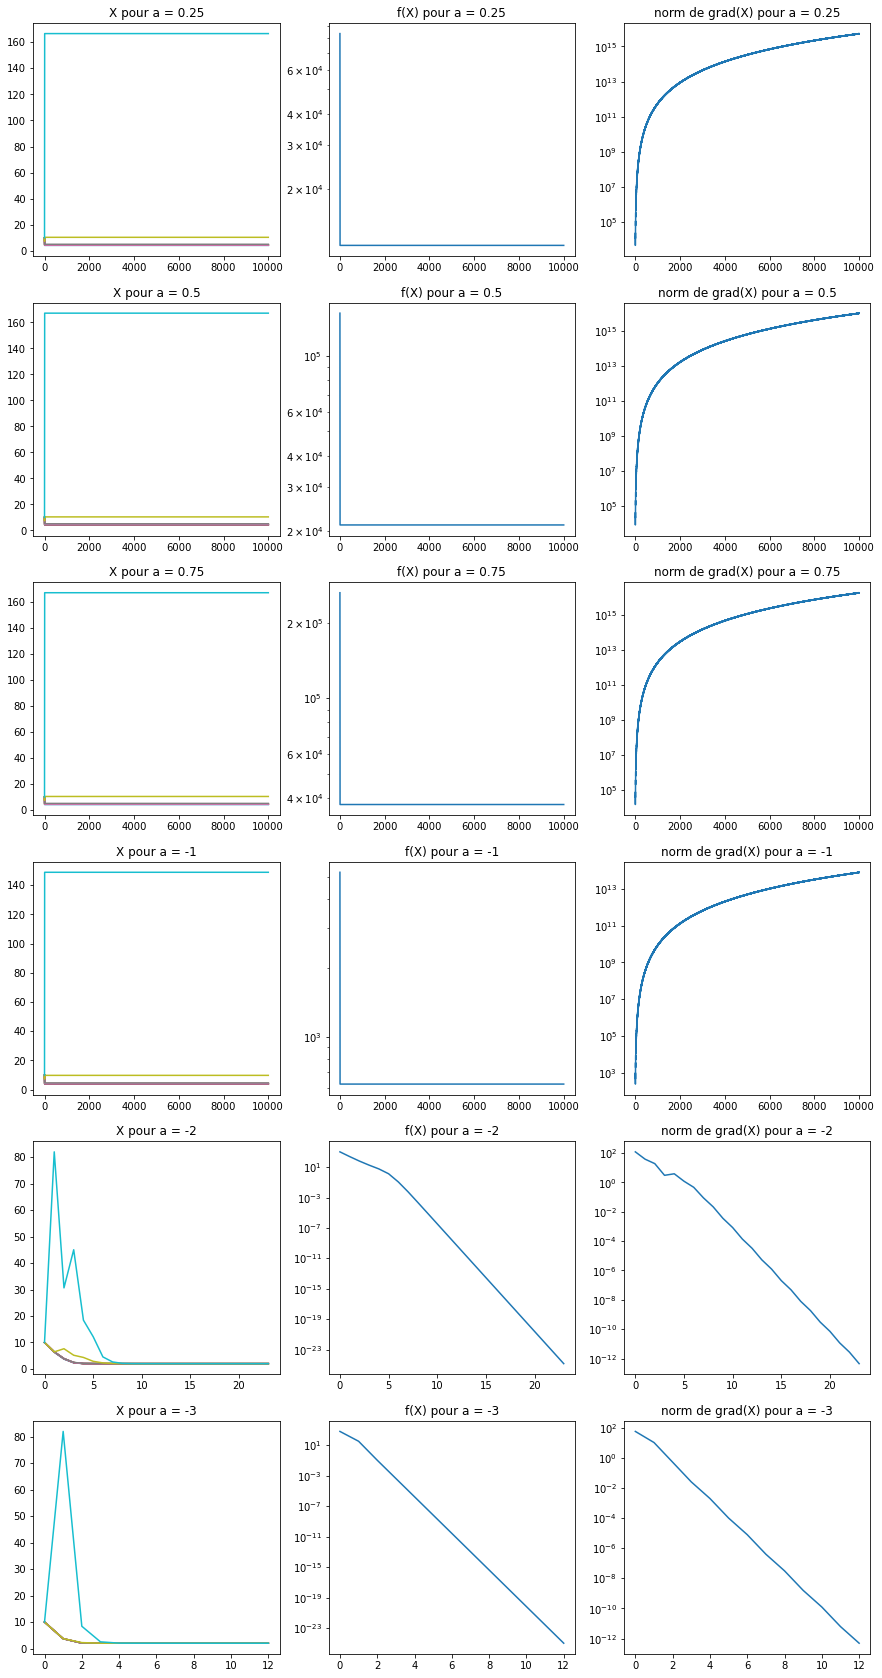

In [335]:
alphas = [0.25, 0.5, 0.75,-1,-2,-3]
plot_x_f_g(algo_newton, f4, alphas, g_f4, g2_f=g2_f4, n_iter = 10**4)

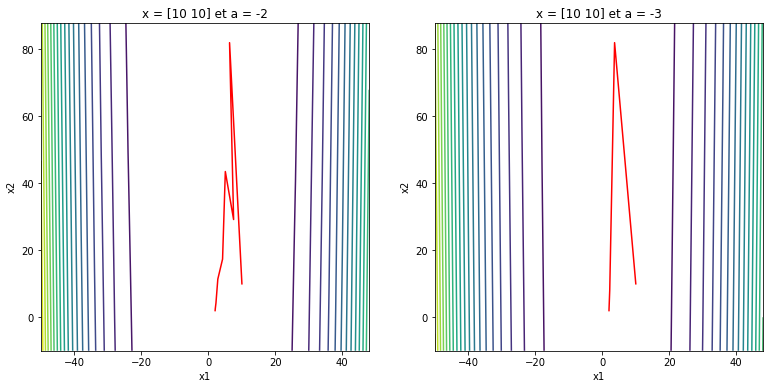

In [11]:
alphas = [-2,-3]
xs = [np.array([10,10])]
plt.figure(figsize=(20,20))
for a in range(len(alphas)):
    for t in range(len(xs)):
        _, Xs, fXs, gXs = algo_newton(f4, alphas[a], xs[t], g_f4,g2_f4)
        x = np.arange(-50, 50, 2)
        y = np.arange(-10, 90, 2)
        X, Y = np.meshgrid(x, y)
        Z = []
        for i in range(len(X)):
            l = []
            for j in range(len(Y)):
                l.append(f4(np.array([X[i][j],Y[i][j]]), alphas[a]))
            Z.append(l)
        plt.subplot(1,3,a+1)
        plt.contour(X,Y,Z,20)
        plt.plot(Xs[:,0],Xs[:,1], c='red')
        plt.title('x = {} et a = {}'.format(xs[t], alphas[a]))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.axis("scaled")
plt.show()

### Question 12 :

In [79]:
from scipy.optimize import line_search, fmin_l_bfgs_b

In [354]:
X_bfgs, f_min, dic = fmin_l_bfgs_b(f1, np.array([10,10,10,10,10,10,10,10,10,10]), fprime = g_f1)

In [362]:
X_newton, Xs_newton, fXs_newton, gXs_newton = algo_newton(f1, 0.5, np.array([10,10,10,10,10,10,10,10,10,10]), g_f1, g2_f1, n_iter=1000, approx=10**(-12))

In [363]:
if f_min > fXs_newton[-1]:
    print("L'algorithme de Newton est meilleur que BFGS pour f1")
else:
    print("L'algorithme de BFGS est meilleur que Newton pour f1")

L'algorithme de Newton est meilleur que BFGS pour f1


In [365]:
X_alg2, Xs_alg2, fXs_alg2, gXs_alg2 = algo2(f1, 0.5, np.array([10,10,10,10,10,10,10,10,10,10]), g_f1, 10, n_iter=1000, approx=10**(-12))

In [366]:
if f_min > fXs_alg2[-1]:
    print("L'algorithme 2 est meilleur que BFGS pour f1")
else:
    print("L'algorithme de BFGS est meilleur que n°2 pour f1")

L'algorithme de BFGS est meilleur que n°2 pour f1


In [352]:
X, f_min, dic = fmin_l_bfgs_b(f3, np.array([10,10,10,10,10,10,10,10,10,10]), fprime = g_f3)